In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
from covidpredictions.DecisionTree import DecisionTree

# Data location

In [4]:
data_path = "../data/clean_data.csv"
save_directory = "current_accuracies/decision_tree/decision_tree_saves"

# Load data

In [5]:
df = pd.read_csv(data_path)

In [6]:
df

,id,Nom du centre,age,Sexe,Lieu de provenance du patient,Echographiste,Tabagisme actif,BPCO,Asthme,Autre antecedent respiratoire,...,Zone posterieure gauche haut,Zone posterieure gauche bas,Oxygenotherapie,Outcome J28,Intensive care unit & death2,Death,Back home,Hospitalization,Intensive care unit,Intensive care unit & death
0,1,0,91,1,0,0,0,0,0,0,...,2,2,3,0,1,1,0,0,0,0
1,109,1,45,0,0,1,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
2,46,2,76,0,1,1,0,0,0,0,...,1,2,2,2,2,0,0,1,0,2
3,247,1,55,0,2,1,1,0,0,0,...,0,0,3,1,1,0,1,0,0,1
4,195,1,42,0,0,1,0,0,0,0,...,0,0,3,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,218,0,34,1,0,0,1,0,0,0,...,0,0,3,1,1,0,1,0,0,1
258,199,2,58,0,0,1,0,0,0,0,...,0,1,2,2,2,0,0,1,0,2
259,117,0,45,0,0,2,0,0,0,0,...,0,0,3,1,1,0,1,0,0,1
260,201,0,46,0,0,2,0,0,0,0,...,0,0,3,1,1,0,1,0,0,1


In [7]:
df.shape

(262, 44)

In [8]:
(df.columns)

Index(['id', 'Nom du centre', 'age', 'Sexe', 'Lieu de provenance du patient',
       'Echographiste', 'Tabagisme actif', 'BPCO', 'Asthme',
       'Autre antecedent respiratoire', 'Hypertension arterielle',
       'Cardiopathie ischemique', 'Cardiopathie rythmique',
       'Diabete de type 1', 'Diabete de type 2', 'Diabetes',
       'Cancer  hemopathie maligne', 'Demence', 'Statut immunodeprime',
       'AINS au long cours (dans le cadre d'une pathologie suivie)',
       'AINS ponctuel recent (cadre des symptomatologies COVID-19 suspect avere)',
       'Tension arterielle systolique (mmHg)',
       'Tension arterielle diastolique (mmHg)',
       'Frequence cardiaque (puls. min)', 'Frequence respiratoire (resp. min)',
       'Temperature (Celsius)', 'Confusion', 'Saturation O2',
       'Zone anterieure droite haut', 'Zone anterieure droite bas',
       'Zone anterieure gauche haut', 'Zone anterieure gauche bas',
       'Zone posterieure droite haut', 'Zone posterieure droite bas',
      

In [9]:
df.iloc[:, 1: -6].columns

Index(['Nom du centre', 'age', 'Sexe', 'Lieu de provenance du patient',
       'Echographiste', 'Tabagisme actif', 'BPCO', 'Asthme',
       'Autre antecedent respiratoire', 'Hypertension arterielle',
       'Cardiopathie ischemique', 'Cardiopathie rythmique',
       'Diabete de type 1', 'Diabete de type 2', 'Diabetes',
       'Cancer  hemopathie maligne', 'Demence', 'Statut immunodeprime',
       'AINS au long cours (dans le cadre d'une pathologie suivie)',
       'AINS ponctuel recent (cadre des symptomatologies COVID-19 suspect avere)',
       'Tension arterielle systolique (mmHg)',
       'Tension arterielle diastolique (mmHg)',
       'Frequence cardiaque (puls. min)', 'Frequence respiratoire (resp. min)',
       'Temperature (Celsius)', 'Confusion', 'Saturation O2',
       'Zone anterieure droite haut', 'Zone anterieure droite bas',
       'Zone anterieure gauche haut', 'Zone anterieure gauche bas',
       'Zone posterieure droite haut', 'Zone posterieure droite bas',
       'Zone

In [10]:
df.iloc[:, -7:].columns

Index(['Outcome J28', 'Intensive care unit & death2', 'Death', 'Back home',
       'Hospitalization', 'Intensive care unit',
       'Intensive care unit & death'],
      dtype='object')

In [11]:
print(df.iloc[:, 1: -6].shape[1], df.iloc[:, -6: -5].shape[1])

37 1


# Split data set into train, validation and test

In [12]:
data = np.loadtxt(data_path, delimiter=",",dtype=float, skiprows=1)
col_names = np.genfromtxt(data_path , delimiter=',', names=True, dtype=float).dtype.names
x_col_names = col_names[1:-6]
y_col_names = col_names[-6:]

X = data[:, 1:-6]
Y = data[:, -6:]


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
print(Y.shape)
print(X.shape)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(262, 6)
(262, 37)
(157, 37)
(157, 6)
(105, 37)
(105, 6)


In [13]:
print(len(x_col_names))
print(len(y_col_names))

37
6


# Depth

In [14]:
DEPTH=7

# Train and test

  Intensive_care_unit__death2   

 Decision tree fit and display  
|--- Outcome_J28 <= 1.0 value 1.0
|---|--- Outcome_J28 = 2.0 value 2.0 else 1.0

              Test              
accuracy ==> 1.0


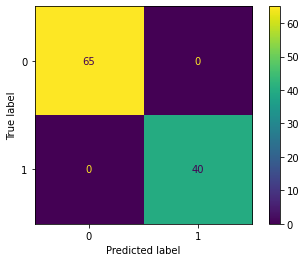





             Death              

 Decision tree fit and display  
|--- Frequence_respiratoire_resp_min <= 30.0 value 0.0
|---|--- Zone_anterieure_droite_haut <= 1.0 value 0.0 else 1.0

              Test              
accuracy ==> 0.9714285714285714


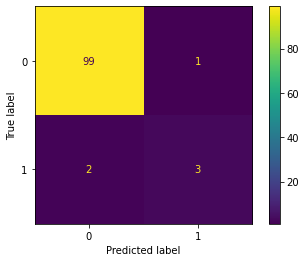





           Back_home            

 Decision tree fit and display  
|--- Outcome_J28 <= 1.0 else  0.0
|---|--- Outcome_J28 = 0.0 value 0.0 else 1.0

              Test              
accuracy ==> 1.0


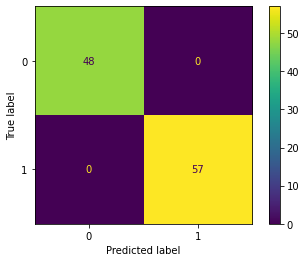





        Hospitalization         

 Decision tree fit and display  
|--- Outcome_J28 <= 1.0 value 0.0
|---|--- Outcome_J28 = 2.0 value 1.0 else 0.0

              Test              
accuracy ==> 1.0


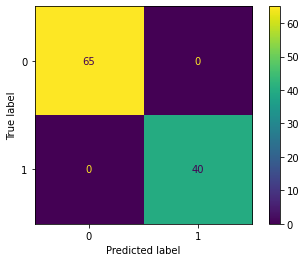





      Intensive_care_unit       

 Decision tree fit and display  
|--- Outcome_J28 <= 2.0 value 0.0 else 1.0

              Test              
accuracy ==> 1.0


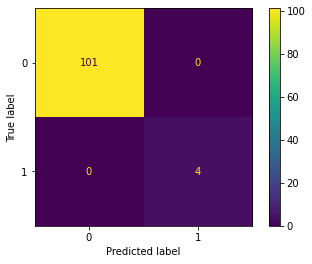





   Intensive_care_unit__death   

 Decision tree fit and display  
|--- Outcome_J28 <= 1.0 else  2.0
|---|--- Outcome_J28 = 0.0 value 0.0 else 1.0

              Test              
accuracy ==> 1.0


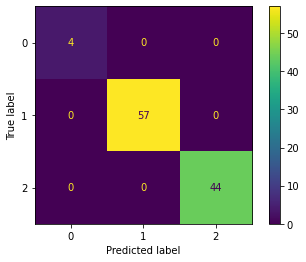





 Mean accuracy of all labels :   0.9952380952380953


In [15]:
total_accuracy = 0
decision_trees = []
for i, column in enumerate(y_col_names):
    print("\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    i = i - 6
    if i == -1:
        Y = data[:, i:]
    else:
        Y = data[:, i:(i+1)]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
   
    print("\x1b[6;30;43m", "Decision tree fit and display".center(30), "\x1b[0m")
    decision_tree = DecisionTree(max_depth=DEPTH)
    decision_tree.fit(X_train, Y_train, x_col_names=x_col_names)
    decision_tree.pretty_print()
    decision_tree.save_tree(os.path.join(save_directory, f'decision_tree_{column}'))
    decision_trees.append(decision_tree)
    
    print("\n\x1b[6;30;43m", "Test".center(30),"\x1b[0m")
    
    total_accuracy += decision_tree.prediction_analyse(X_test, Y_test)
    print("\n\n\n")

print("\x1b[6;30;42m", "Mean accuracy of all labels :".center(30), "\x1b[0m", total_accuracy / len(y_col_names))

In [16]:
y_col_names

('Intensive_care_unit__death2',
 'Death',
 'Back_home',
 'Hospitalization',
 'Intensive_care_unit',
 'Intensive_care_unit__death')

# Evaluation on one human

In [17]:
preds = []
for i, column in enumerate(y_col_names):
    i = i - 6
    if i == -1:
        Y = data[:, i:]
    else:
        Y = data[:, i:(i+1)]
    X = data[:, 1:-6]
    
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
    print("\n\x1b[6;30;41m\033[1m", column.center(30), "\x1b[0m\033[0m\n")
    _, pred = decision_trees[i].predict_one_element(X_test[2], display_evaluation_flow=True)
    label = Y_test[2]
    
    if i == -6:
        out = pred
    elif i == -1:
        low_classes = pred
    else:
        preds.append(pred)

trees = np.argmax(preds)
print('preds', preds, ", pred outcome : ", out, ", pred trees : ", trees, "low_classes : ", low_classes)

if out == trees:
        definitive = out
else:
    if trees == 0 and low_classes == trees:
        definitive = trees
    elif (trees == 1 or trees == 2) and low_classes == 1:
        definitive = trees
    elif trees == 3 and low_classes == 2:
        definitive = trees
    else:
        definitive = out
        

print("definitive prediction", definitive, "label : ", label)



  Intensive_care_unit__death2   

Outcome_J28 : 1.0 <= 1.0
Value : 1.0

             Death              

Outcome_J28 : 1.0 <= 1.0
Frequence_respiratoire_resp_min : 25.0 <= 30.0
Value : 0.0

           Back_home            

Outcome_J28 : 1.0 <= 1.0
Frequence_respiratoire_resp_min : 25.0 <= 30.0
Outcome_J28 : 1.0 <= 1.0
Outcome_J28 : 1.0 != 0.0
Value : 1.0

        Hospitalization         

Outcome_J28 : 1.0 <= 1.0
Frequence_respiratoire_resp_min : 25.0 <= 30.0
Outcome_J28 : 1.0 <= 1.0
Outcome_J28 : 1.0 != 0.0
Outcome_J28 : 1.0 <= 1.0
Value : 0.0

      Intensive_care_unit       

Outcome_J28 : 1.0 <= 1.0
Frequence_respiratoire_resp_min : 25.0 <= 30.0
Outcome_J28 : 1.0 <= 1.0
Outcome_J28 : 1.0 != 0.0
Outcome_J28 : 1.0 <= 1.0
Outcome_J28 : 1.0 <= 2.0
Value : 0.0

   Intensive_care_unit__death   

Outcome_J28 : 1.0 <= 1.0
Frequence_respiratoire_resp_min : 25.0 <= 30.0
Outcome_J28 : 1.0 <= 1.0
Outcome_J28 : 1.0 != 0.0
Outcome_J28 : 1.0 <= 1.0
Outcome_J28 : 1.0 <= 2.0
Outcome_J28 : 1.0 <=

# Get all predictions

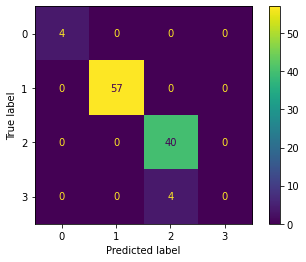

Accuracy: 0.961905
Precision: 0.927273
Recall: 0.961905
F1 score: 0.943764


/home/ines/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
total_acc = 0
all_preds = []
all_labels = []
for patient in range(len(X_test)):
    preds = []
    for i, column in enumerate(y_col_names):
        i = i - 6
        if i == -1:
            Y = data[:, i:]
        else:
            Y = data[:, i:(i+1)]
        X = data[:, 1:-6]

        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.4, random_state=42)
        _, pred = decision_trees[i].predict_one_element(X_test[patient], display_evaluation_flow=False)
        label = Y_test[patient]

        if i == -6:
            out = pred
        elif i == -1:
            low_classes = pred
        else:
            preds.append(pred)

    trees = np.argmax(preds)

    if out == trees:
        definitive = out
    else:
        if trees == 0 and low_classes == trees:
            definitive = trees
        elif (trees == 1 or trees == 2) and low_classes == 1:
            definitive = trees
        elif trees == 3 and low_classes == 2:
            definitive = trees
        else:
            definitive = out

    all_labels.append(label)
    all_preds.append(definitive)
    
cm = confusion_matrix(all_preds, all_labels)
display = ConfusionMatrixDisplay(confusion_matrix=cm)
display.plot()
plt.show()

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(all_preds, all_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(all_preds, all_labels, average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(all_preds, all_labels, average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(all_preds, all_labels, average='weighted')
print('F1 score: %f' % f1)

# Predict and make submission

## Load tests

In [19]:
test_path = "../data/clean_test_data.csv"

In [20]:
df_test = np.loadtxt(test_path, delimiter=",",dtype=float, skiprows=1)

In [21]:
print(df_test.shape)
df_test

(66, 37)


array([[237.,   1.,  39., ...,   0.,   0.,   3.],
       [236.,   1.,  42., ...,   0.,   0.,   3.],
       [253.,   2.,  70., ...,   1.,   1.,   0.],
       ...,
       [313.,   1.,  63., ...,   0.,   0.,   3.],
       [134.,   0.,  66., ...,   0.,   0.,   0.],
       [105.,   0.,  63., ...,   0.,   0.,   3.]])

In [22]:
res = pd.DataFrame(data=df_test[:, 0], columns=["id"])
res["id"] = res["id"].astype(int)
print(df_test.shape)
res

(66, 37)


,id
0,237
1,236
2,253
3,92
4,53
...,...
61,151
62,39
63,313
64,134


In [23]:
X = df_test[:, 1:]

In [24]:
all_preds = []
for patient in range(len(X)):
    preds = []
    for i, column in enumerate(y_col_names):
        i = i - 6
        if i == -1:
            Y = data[:, i:]
        else:
            Y = data[:, i:(i+1)]
        X = data[:, 1:-6]

        _, pred = decision_trees[i].predict_one_element(X[patient], display_evaluation_flow=False)

        if i == -6:
            out = pred
        elif i == -1:
            low_classes = pred
        else:
            preds.append(pred)

    trees = np.argmax(preds)
    
    if out == trees:
        definitive = out
    else:
        if trees == 0 and low_classes == trees:
            definitive = trees
        elif (trees == 1 or trees == 2) and low_classes == 1:
            definitive = trees
        elif trees == 3 and low_classes == 2:
            definitive = trees
        else:
            definitive = out

    all_preds.append(definitive)

In [25]:
res['prediction'] = all_preds
res['prediction'].replace({0 : "Death", 1 : "Back home", 2 : 'Hospitalization', 3 : 'Intensive care unit'}, inplace=True)

In [26]:
res.to_csv("../prediction_decision_tree.csv", sep=";", index=False)

In [27]:
res

,id,prediction
0,237,Death
1,236,Back home
2,253,Hospitalization
3,92,Back home
4,53,Back home
...,...,...
61,151,Back home
62,39,Back home
63,313,Back home
64,134,Back home
